In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json

In [2]:
repo_targets = {}
with open("repo_target_core.json") as tj:
    for l in tj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        targets = set(line[1:])
        repo_targets[repo] = targets

In [3]:
def NDCG(repo,rec,repo_targets):
    dcg = 0
    for i,tm in enumerate(rec):
        if tm in repo_targets[repo]:
            dcg += 1/np.log2(i+2)
    target_cnt = 0
    idcg =  0
    for tm in repo_targets[repo]:
        target_cnt += 1
        idcg += 1/np.log2(target_cnt+1)
    dcg /= idcg
    return dcg

In [4]:
recommendations = {}
with open('recommend_random_walk_core.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        recs = [json.loads(l)[0] for l in line[1:]]
        recommendations[repo] = recs

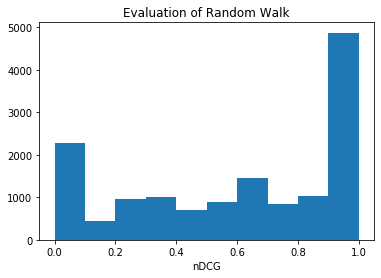

0.0 1.0


In [5]:
NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],repo_targets))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of Random Walk")
plt.savefig('evaluate_core_3.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))